#### Introduction

Portal berita pada sebuah website merupakan salah satu wujud nyata kemajuan industri di bidang jurnalistik. Keberadaannya memberikan kemudahan bagi masyarakat untuk mengakses informasi terkait berbagai peristiwa di suatu daerah. Di sisi lain, portal berita juga memudahkan para jurnalis dalam menyampaikan dan mempublikasikan berita secara cepat dan efisien.

Dalam analisis data ini, fokus pembahasan diarahkan pada pemberitaan dari sebuah portal berita di salah satu kabupaten di Jawa Barat, yaitu Ciamis, pada periode Januari 2025 hingga Juli 2025.

#### DATA UNDERSTANDING


Dataset portal berita "Harapan Rakyat" yang diperoleh melalui proses scraping memuat berbagai informasi, antara lain:

Judul : Judul berita yang ditampilkan pada portal.

Isi : Konten utama berita yang memuat informasi yang ditulis oleh seorang jurnalis.

Penulis : Nama penulis atau jurnalis yang membuat artikel berita.

Rilis : Informasi mengenai tanggal, bulan, dan tahun berita tersebut diterbitkan.

Sumber : Media atau portal tempat berita tersebut dipublikasikan, dalam hal ini Harapan Rakyat.

URL : Tautan yang mengarah langsung ke halaman berita tersebut.

### INSTALL LIBRARY WORDCLOUD

In [1]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [2]:
pip install Sastrawi

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### TOOLS

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image
import numpy as np
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
import nltk
import warnings
warnings.filterwarnings('ignore')


### Membuat dataframe

In [4]:
df_article = pd.read_csv(r"D:\Magang\scraping harapan rakyat\harapan rakyat ciamis clean.csv")
df_article.set_index("NO", inplace=True)
df_article

,judul,isi,penulis,rilis,sumber,url
NO,,,,,,
1,"Demi Transparansi Keuangan, Ciamis Latih Duta ...","harapanrakyat.com,- Guna menghadapi era digita...",Fahmi Albartiansyah,"Juli 29, 2025",Harapan Rakyat,https://www.harapanrakyat.com/2025/07/demi-tra...
2,"Hari Anak Nasional, RSUD Ciamis Hibur dan Eduk...","harapanrakyat.com,- Senyum ceria menghiasi waj...",Fahmi Albartiansyah,"Juli 29, 2025",Harapan Rakyat,https://www.harapanrakyat.com/2025/07/hari-ana...
3,"Cegah Stunting, Rina Saadah dan KKP Gelar Safa...","harapanrakyat.com,- Anggota Komisi IV DPR RI, ...",Feri Ramdani,"Juli 28, 2025",Harapan Rakyat,https://www.harapanrakyat.com/2025/07/cegah-st...
4,"Gagal Nanjak, Mobil Box Bermuatan AMDK Tabrak ...","harapanrakyat.com,- Sebuah mobil box bermuatan...",Edji Darsono,"Juli 31, 2025",Harapan Rakyat,https://www.harapanrakyat.com/2025/07/gagal-na...
5,"Kasus DBD di Ciamis Turun, Dinkes Imbau Tetap ...","harapanrakyat.com,- Dinas Kesehatan Ciamis men...",Feri Ramdani,"Juli 28, 2025",Harapan Rakyat,https://www.harapanrakyat.com/2025/07/kasus-db...
...,...,...,...,...,...,...
1020,Herdiat Sunarya Apresiasi PSGC Ciamis: 9 Perta...,"harapanrakyat.com,- PSGC Ciamis sampai sejauh ...",Feri Ramdani,"Januari 9, 2025",Harapan Rakyat,https://www.harapanrakyat.com/2025/01/herdiat-...
1021,"Patanjala Coffee, Cafe Nuansa Jepang di Ciamis...","harapanrakyat.com,- Pecinta kopi merapat, di C...",Karwati Putu Latief,"Januari 4, 2025",Harapan Rakyat,https://www.harapanrakyat.com/2025/01/patanjal...
1022,KPU Tetapkan Bupati dan Wakil Bupati Ciamis Te...,"harapanrakyat.com,- Komisi Pemilihan Umum (KPU...",Fahmi Albartiansyah,"Januari 9, 2025",Harapan Rakyat,https://www.harapanrakyat.com/2025/01/kpu-teta...


In [5]:
df_article.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1024 entries, 1 to 1024
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   judul    1024 non-null   object
 1   isi      1024 non-null   object
 2   penulis  1024 non-null   object
 3   rilis    1024 non-null   object
 4   sumber   1024 non-null   object
 5   url      1024 non-null   object
dtypes: object(6)
memory usage: 56.0+ KB


Informasi isi dari dataframe artikel Harapan Rakyat

In [6]:
# Mengubah format penanggalan kolom rilis
bulan_map = {
    'Januari': 'January',
    'Februari': 'February',
    'Maret': 'March',
    'April': 'April',
    'Mei': 'May',
    'Juni': 'June',
    'Juli': 'July',
    'Agustus': 'August',
    'September': 'September',
    'Oktober': 'October',
    'November': 'November',
    'Desember': 'December'
}
df_article['rilis'] = df_article['rilis'].replace(bulan_map, regex=True)
df_article['rilis'] = pd.to_datetime(df_article['rilis'], format='%B %d, %Y', errors='coerce')

Sebelumnya, kolom "Rilis" memiliki tipe data object. Padahal, kolom ini berisi informasi tanggal, bulan, dan tahun sehingga seharusnya menggunakan tipe data datetime. Oleh karena itu, tipe data pada kolom Rilis perlu diubah terlebih dahulu agar sesuai dengan format tanggal.

### DATA CLEANING

In [7]:
#Chek nilai Nan
df_article[['judul', 'isi', 'penulis', 'rilis', 'sumber', 'url']].isna().sum()

judul        0
isi          0
penulis      0
rilis      173
sumber       0
url          0
dtype: int64

In [8]:
#Hapus data kosong pada kolom rilis 
df_clean = df_article.dropna(subset=['rilis'])

In [9]:
#Chek data duplicate
df_clean.duplicated().sum()

1

In [10]:
#Hapus data duplikat

df_clean = df_clean.drop_duplicates()

In [11]:
#data dimensi dataframe cleam
df_clean.shape

(850, 6)

### EDA

In [12]:
# data dimensi
df_clean.shape

(850, 6)

Dataframe article memiliki 850 rows dan 6 kolom

In [13]:
#informasi tipe data pada dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 850 entries, 1 to 1024
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   judul    850 non-null    object        
 1   isi      850 non-null    object        
 2   penulis  850 non-null    object        
 3   rilis    850 non-null    datetime64[ns]
 4   sumber   850 non-null    object        
 5   url      850 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 46.5+ KB


Informasi data frame article setelah proses cleaning dan pengubahan kolom rilis menjadi datetime

In [14]:
#Perhitungan statistik 
df_clean.describe()

,rilis
count,850
mean,2025-04-21 02:56:11.294117888
min,2025-01-01 00:00:00
25%,2025-02-24 00:00:00
50%,2025-05-08 12:00:00
75%,2025-06-16 00:00:00
max,2025-07-31 00:00:00


- Jumlah artikel yang dianalisis: 1.021.


- Artikel pertama dirilis pada 1 Januari 2025, dan artikel terakhir pada 31 Juli 2025.


- Rata-rata tanggal rilis berada di 20 April 2025, menunjukkan distribusi penerbitan cukup merata di tengah periode.


- Kuartil (Q1, Median, Q3) :
    - 25% artikel telah terbit sebelum 3 Maret 2025,
    - 50% artikel terbit sebelum 21 April 2025 (median),
    - 75% artikel terbit sebelum 8 Juni 2025.


Pola distribusi tanggal menunjukkan aktivitas penerbitan artikel yang konsisten dari Januari hingga Juli 2025, dengan lonjakan kemungkinan terjadi di awal Maret, akhir April, dan awal Juni.

In [15]:
df_clean.describe(include='object')

,judul,isi,penulis,sumber,url
count,850,850,850,850,850
unique,850,850,15,1,850
top,"Demi Transparansi Keuangan, Ciamis Latih Duta ...","harapanrakyat.com,- Guna menghadapi era digita...",Feri Ramdani,Harapan Rakyat,https://www.harapanrakyat.com/2025/07/demi-tra...
freq,1,1,366,850,1


Perhitungan statistik tipe data object

##### Mencari penulis paling productive
Mencari penulis yang paling banyak membuat artikel periode Januari 2025-July 2025

In [16]:
jumlah_penulis = df_clean.groupby('penulis')['judul'].count()
jumlah_penulis = jumlah_penulis.sort_values(ascending=False)
print(jumlah_penulis)

penulis
Feri Ramdani               366
Fahmi Albartiansyah        137
Suherman                   104
Edji Darsono                74
Jujang                      73
Eli Suherli                 45
Karwati Putu Latief         19
Dadang Hermansyah           16
Ahmad Muhafid                6
Erna Ayunda                  3
Adi Karyanto                 2
Reza Deny                    2
Eva Lativah                  1
Penulis tidak ditemukan      1
Sri Rahayu                   1
Name: judul, dtype: int64


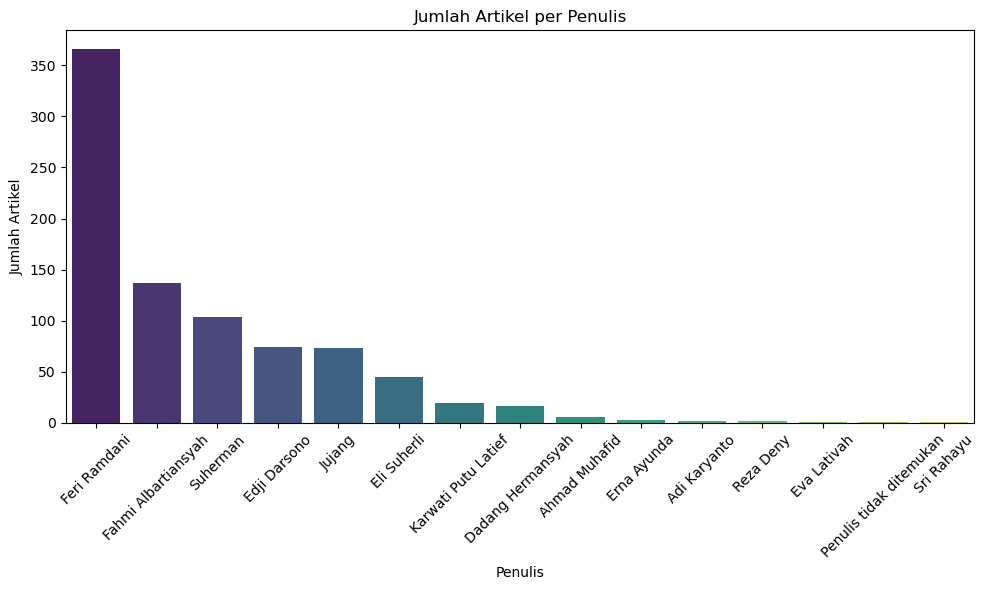

In [17]:
penulis_count = df_clean.groupby('penulis')['judul'].count().reset_index()
penulis_count = penulis_count.sort_values(by='judul', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=penulis_count, x='penulis', y='judul', palette='viridis')

plt.title('Jumlah Artikel per Penulis')
plt.xlabel('Penulis')
plt.ylabel('Jumlah Artikel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Penulis paling productive telah merilis artikel dengan jumlah terbanyak pada periode Januari 2025 hingga Juli 2025 adalah Feri Ramdhani, dengan total 409 artikel yang telah dipublikasikan.

In [18]:
df_feri = df_clean[df_clean['penulis'].apply(lambda x: 'Feri Ramdani' in x)][['rilis', 'judul']]
df_feri

,rilis,judul
NO,,
3,2025-07-28,"Cegah Stunting, Rina Saadah dan KKP Gelar Safa..."
5,2025-07-28,"Kasus DBD di Ciamis Turun, Dinkes Imbau Tetap ..."
9,2025-07-31,"Galuh Go Digital dan Hot Maknyus, Strategi Pem..."
10,2025-07-29,"Bersama KKP, Rina Saadah Ajak Masyarakat Gemar..."
12,2025-07-29,DKUKMP Ciamis Tingkatkan Kualitas Usaha Kecil ...
...,...,...
1013,2025-01-08,"PSGC Ciamis Imbang Lawan Tornado FC, Asisten P..."
1014,2025-01-11,Rumpun Bambu di Pinggir Jalan Tanjakan Cibeka ...
1017,2025-01-13,"Tantang 757 Kepri Jaya, PSGC Ciamis Optimis Ra..."


Check Seorang penulis paling productive bernama Feri Ramdhani tercatat telah merilis sebanyak 409 artikel, lengkap dengan judul dan tanggal perilisan masing-masing artikel.

##### Grafik analisis artikel setiap bulan

Mengecek berapa banyak setiap bulan artikel terbit.

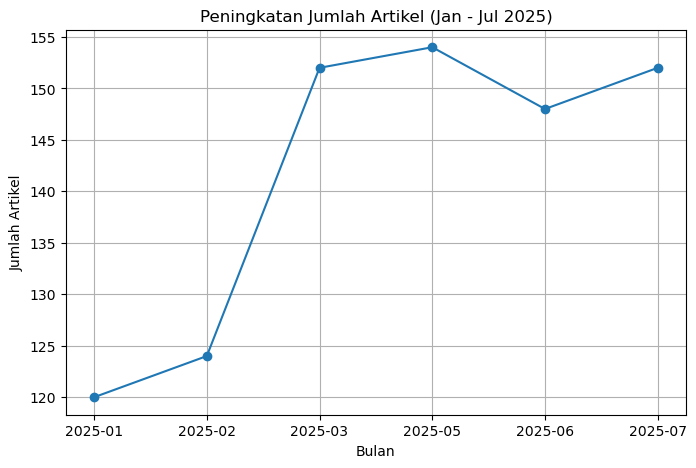

In [19]:
df_clean['bulan'] = df_clean['rilis'].dt.strftime('%Y-%m')
article_per_bulan = df_clean.groupby('bulan')['judul'].count().reset_index()
article_per_bulan = article_per_bulan[
    (article_per_bulan['bulan'] >= '2025-01') &
    (article_per_bulan['bulan'] <= '2025-07')
]
plt.figure(figsize=(8,5))
plt.plot(article_per_bulan['bulan'], article_per_bulan['judul'], marker='o', linestyle='-')
plt.title('Peningkatan Jumlah Artikel (Jan - Jul 2025)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Artikel')
plt.grid(True)
plt.show()


Analisis peningkatan penulisan artikel dari bulan Januari-July 2025.
Peningkatan paling tinggi terjadi pada bulan April 2025

In [20]:
df_clean['rilis'] = pd.to_datetime(df_clean['rilis'], errors='coerce')
df_clean['bulan'] = df_clean['rilis'].dt.strftime('%Y-%m')
article_per_bulan = df_clean.groupby('bulan')['judul'].count().reset_index()
article_per_bulan = article_per_bulan[
    (article_per_bulan['bulan'] >= '2025-01') &
    (article_per_bulan['bulan'] <= '2025-07')
]

print(article_per_bulan)


     bulan  judul
0  2025-01    120
1  2025-02    124
2  2025-03    152
3  2025-05    154
4  2025-06    148
5  2025-07    152


1. Pada periode Januari hingga April 2025, jumlah artikel yang terbit mengalami tren peningkatan. Namun, pada periode April hingga Mei 2025, terjadi sedikit penurunan jumlah artikel. Memasuki bulan Juli 2025, jumlah artikel kembali mengalami peningkatan meskipun tidak signifikan.

2. Bulan Juli 2025 tercatat sebagai bulan dengan jumlah artikel terbanyak, yaitu sebanyak 171 artikel.

3. Bulan Januari 2025 menjadi bulan dengan jumlah artikel paling sedikit, yaitu sebanyak 120 artikel.

### WORDCLOUD JUDUL

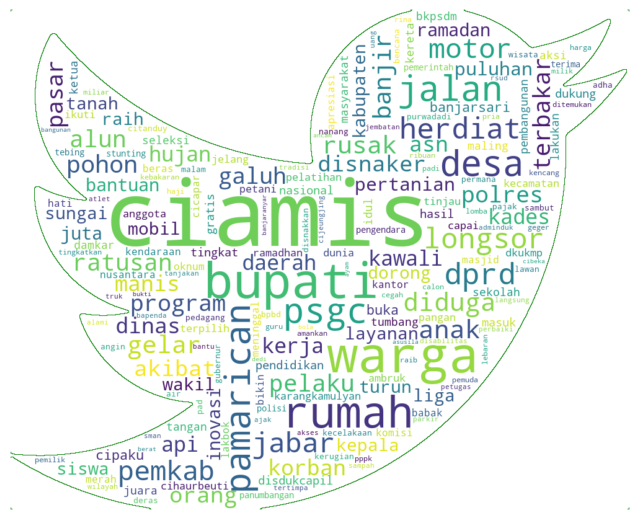

       Frasa  Jumlah  Persentase
0     ciamis     840       10.86
1      warga      93        1.20
2     bupati      88        1.14
3      rumah      68        0.88
4       desa      42        0.54
5      jalan      41        0.53
6  pamarican      41        0.53
7       psgc      41        0.53
8       dprd      30        0.39
9    herdiat      29        0.37


In [21]:

# stopwords bawaan wordcloud
wc_stopwords = set(STOPWORDS)
nltk_stopwords = set(stopwords.words('indonesian'))
stopwords_all = wc_stopwords.union(nltk_stopwords)
stopwords_all.update([
    "saja", "sudah", "para", "akan", "agar", "seperti", "karena",
    "dan", "di", "ke", "yang", "untuk", "pada", "ini", "ada", "dari",
    "tak", "itu", "saat", "juga", "dengan", "tidak", "dalam", "tersebut",
    "bisa", "melakukan"
])
text = ' '.join(df_clean['judul'].astype(str))

# buat mask untuk wordcloud
leaf_mask = np.array(Image.open(r"D:\Magang\twitter_mask.png"))

# buat wordcloud
vectorizer = CountVectorizer(
    ngram_range=(1,1),
    stop_words=list(stopwords_all),
    token_pattern=r'\b[a-zA-Z]{3,}\b'
)

X = vectorizer.fit_transform([text])
freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

wordcloud = WordCloud(
    width=1000,
    height=1000,
    background_color='white',
    mask=leaf_mask,
    contour_width=1,
    contour_color='green'
).generate_from_frequencies(freq)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
top10 = sorted(freq.items(), key=lambda x: x[1], reverse=True)[:10]

# total semua kata
total = sum(freq.values())

# buat DataFrame
df_top10 = pd.DataFrame(top10, columns=["Frasa", "Jumlah"])
df_top10["Persentase"] = (df_top10["Jumlah"] / total * 100).round(2)

print(df_top10)


Isu yang di ungkap pada judul pemberitaan ciamis

- Pemerintahan: Sorotan pada bupati, program pemerintahan kabupaten, dan pelayanan publik.

- Kehidupan masyarat : banyak berita tentang warga, desa, anak, siswa.

- Bencana dan musibah : banyak berita mengangkat isu longsor, banjir, rumah.

- Infrastruktu : jalan, jembatan, alun-alun(fasilitar public)

- Olahraga : Pemberitaan tim sepak bola lokal PSGC ciamis.

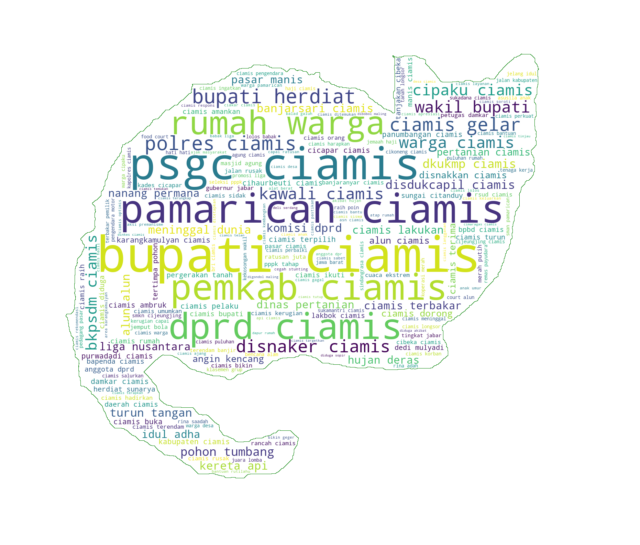

              Frasa  Jumlah  Persentase
0     bupati ciamis      51        0.66
1       psgc ciamis      40        0.52
2  pamarican ciamis      33        0.43
3       dprd ciamis      26        0.34
4     pemkab ciamis      26        0.34
5       rumah warga      22        0.28
6    bupati herdiat      20        0.26
7     polres ciamis      19        0.25
8      ciamis gelar      17        0.22
9   disnaker ciamis      15        0.19


In [22]:

wc_stopwords = set(STOPWORDS)
nltk_stopwords = set(stopwords.words('indonesian'))
stopwords_all = wc_stopwords.union(nltk_stopwords)
stopwords_all.update([
    "saja", "sudah", "para", "akan", "agar", "seperti", "karena",
    "dan", "di", "ke", "yang", "untuk", "pada", "ini", "ada", "dari",
    "tak", "itu", "saat", "juga", "dengan", "tidak", "dalam", "tersebut",
    "bisa", "melakukan"
])
text = ' '.join(df_clean['judul'].astype(str))

# buat mask untuk wordcloud
leaf_mask = np.array(Image.open(r"D:\Magang\Shape for wordcloud\Mask.png"))

# buat wordcloud
vectorizer = CountVectorizer(
    ngram_range=(2,2),
    stop_words=list(stopwords_all),
    token_pattern=r'\b[a-zA-Z]{3,}\b'
)

X = vectorizer.fit_transform([text])
freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

wordcloud = WordCloud(
    width=1000,
    height=1000,
    background_color='white',
    mask=leaf_mask,
    contour_width=1,
    contour_color='green'
).generate_from_frequencies(freq)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
top10 = sorted(freq.items(), key=lambda x: x[1], reverse=True)[:10]

# total semua kata
total = sum(freq.values())

# buat DataFrame
df_top10 = pd.DataFrame(top10, columns=["Frasa", "Jumlah"])
df_top10["Persentase"] = (df_top10["Jumlah"] / total * 100).round(2)

print(df_top10)


Kata "Bupati Ciamis" Menandakan bahwa judul berita mendominasi mengenai bupati Ciamis

Kata "Pamarican Ciamis", "Alun-alun Ciamis", "Kawali Ciamis" Sering muncul, menandakan judul artikel pada berita banyak mengangkat berita pada beberapa kecamatan kabupaten Ciamis.

Kata "disnaker ciamis", "pemkab ciamis" "dprd ciamis", dan "Polres ciamis" Menunjukan topik judul yang terkait dengan pemerintahan, legislatif, dan kepolisian.

Kara "rumah warga" mengarah pada berita seputar kehidupan masyarakat dan pemukiman.

Kata "Bupati Herdiat" judul berita mengacu pada bupati kabupaten Ciamis yang menandakan adanya berita kegiatan, acara atau program pemerintah.

Kata "PSGC Ciamis" judul berita mengacu pada berita olahraga tim sepak bola lokal ciamis.

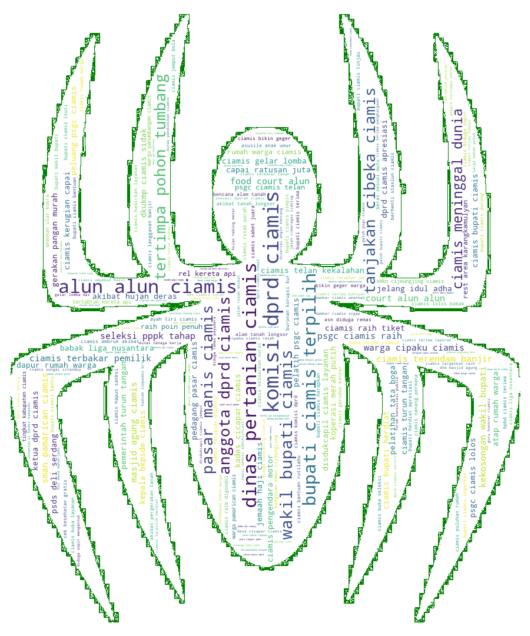

                    Frasa  Jumlah  Persentase
0      komisi dprd ciamis      10        0.13
1        alun alun ciamis       8        0.10
2  dinas pertanian ciamis       8        0.10
3  bupati ciamis terpilih       7        0.09
4     wakil bupati ciamis       6        0.08
5     anggota dprd ciamis       5        0.06
6      pasar manis ciamis       5        0.06
7  tanjakan cibeka ciamis       5        0.06
8  tertimpa pohon tumbang       5        0.06
9  ciamis meninggal dunia       4        0.05


In [23]:

# stopwords bawaan wordcloud
wc_stopwords = set(STOPWORDS)
nltk_stopwords = set(stopwords.words('indonesian'))
stopwords_all = wc_stopwords.union(nltk_stopwords)
stopwords_all.update([
    "saja", "sudah", "para", "akan", "agar", "seperti", "karena",
    "dan", "di", "ke", "yang", "untuk", "pada", "ini", "ada", "dari",
    "tak", "itu", "saat", "juga", "dengan", "tidak", "dalam", "tersebut",
    "bisa", "melakukan"
])
text = ' '.join(df_clean['judul'].astype(str))

# buat mask untuk wordcloud
leaf_mask = np.array(Image.open(r"D:\Magang\Shape for wordcloud\spider.jpg"))

# buat wordcloud
vectorizer = CountVectorizer(
    ngram_range=(3,3),
    stop_words=list(stopwords_all),
    token_pattern=r'\b[a-zA-Z]{3,}\b'
)

X = vectorizer.fit_transform([text])
freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

wordcloud = WordCloud(
    width=1000,
    height=1000,
    background_color='white',
    mask=leaf_mask,
    contour_width=1,
    contour_color='green'
).generate_from_frequencies(freq)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
top10 = sorted(freq.items(), key=lambda x: x[1], reverse=True)[:10]

# total semua kata
total = sum(freq.values())

# buat DataFrame
df_top10 = pd.DataFrame(top10, columns=["Frasa", "Jumlah"])
df_top10["Persentase"] = (df_top10["Jumlah"] / total * 100).round(2)

print(df_top10)


Kata "Alun-alun Ciamis" dan "Dinas Pertanian" menunjukan topik judul dominan yang sering muncuk mengacu pada fasilitas publik dan dinas pertanian.

Kata "Court alun-alun" Topik judul berita mengidikasikan pada fasilitas publik.

Kata "Komisi DPRD Ciamis", "Anggota DPRD Ciamis", "Pasar Manis Ciamis", "Wakil Pubati Ciamis", "bupati ciamis terpilih" mengindikasikan topik judul pada legislatif daerah, fasilitas publik(pasar), dan penjabat daerah.

Kata "Ciamis terendam banjir" mengindikasikan pada judul berita bencana alam banjir

### WORDCLOUD ISI

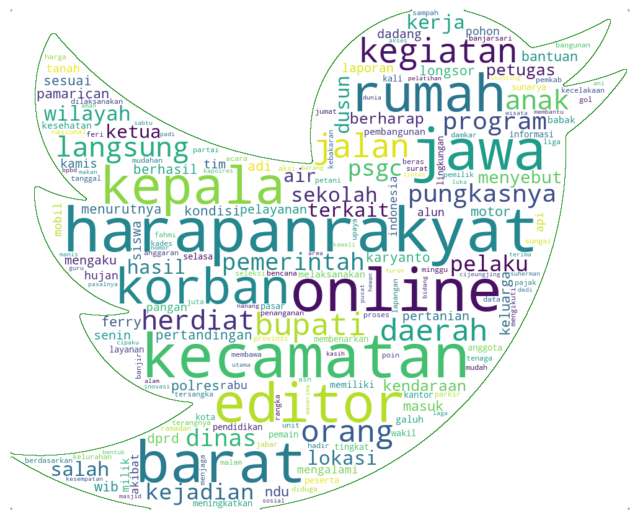

           Frasa  Jumlah  Persentase
0  harapanrakyat     980        0.76
1      kecamatan     955        0.74
2         online     904        0.70
3          barat     844        0.65
4           jawa     843        0.65
5         editor     771        0.59
6         kepala     697        0.54
7          rumah     692        0.53
8         korban     668        0.51
9       kegiatan     638        0.49


In [24]:

# stopwords bawaan wordcloud
wc_stopwords = set(STOPWORDS)
nltk_stopwords = set(stopwords.words('indonesian'))
stopwords_all = wc_stopwords.union(nltk_stopwords)
stopwords_all.update([
    "ciamis", "desa", "kabupaten", "warga", "masyarakat",
    "saja", "sudah", "para", "akan", "agar", "seperti", "karena",
    "dan", "di", "ke", "yang", "untuk", "pada", "ini", "ada", "dari",
    "tak", "itu", "saat", "juga", "dengan", "tidak", "dalam", "tersebut",
    "bisa", "melakukan"
])
text = ' '.join(df_clean['isi'].astype(str))

# buat mask untuk wordcloud
leaf_mask = np.array(Image.open(r"D:\Magang\twitter_mask.png"))

# buat wordcloud
vectorizer = CountVectorizer(
    ngram_range=(1,1),
    stop_words=list(stopwords_all),
    token_pattern=r'\b[a-zA-Z]{3,}\b'
)

X = vectorizer.fit_transform([text])
freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

wordcloud = WordCloud(
    width=1000,
    height=1000,
    background_color='white',
    mask=leaf_mask,
    contour_width=1,
    contour_color='green'
).generate_from_frequencies(freq)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
top10 = sorted(freq.items(), key=lambda x: x[1], reverse=True)[:10]

# total semua kata
total = sum(freq.values())

# buat DataFrame
df_top10 = pd.DataFrame(top10, columns=["Frasa", "Jumlah"])
df_top10["Persentase"] = (df_top10["Jumlah"] / total * 100).round(2)

print(df_top10)


Kata "Ciamis" kata yang sering muncul pada isi berita

Kata "Kabupaten", "warga" menandakan isi berita mengacu pada kehidupan warga kabupaten Ciamis

Kata "Desa", "Kecamatan", dan "kepala" Menunjukan banyak isi berita yang berkaitan dengan pemerintahan desa, camat dan penjabat lokal.

Kata "Bupati" dan "herdiat menandakan isi berita terkait pimpinan daerah.

Kata "Korban", "rumah" dan jalan mengidikasikan adanya pemberitaan tentang peristiwa bencana, infrastruktur atau insiden yang melibatkan warga.

Kata "online", "editor", "Harapan Rakyat" menunjukan konteks media dan platform yang digunakan.

Kata "Kegiatan", "Program" mengacu pada berita tentang aktivitas program pemerintah


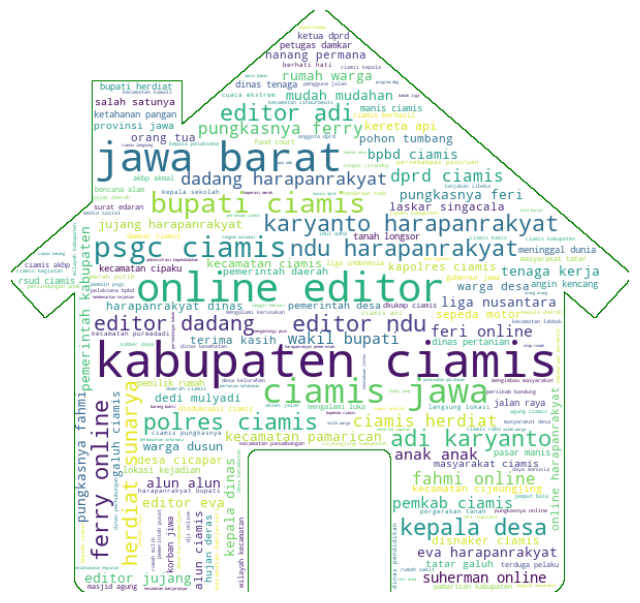

               Frasa  Jumlah  Persentase
0   kabupaten ciamis    1153        0.83
1         jawa barat     800        0.57
2      online editor     770        0.55
3        ciamis jawa     541        0.39
4        psgc ciamis     379        0.27
5      bupati ciamis     356        0.26
6       ferry online     228        0.16
7         editor ndu     224        0.16
8  ndu harapanrakyat     222        0.16
9      polres ciamis     221        0.16


In [25]:

# stopwords bawaan wordcloud
wc_stopwords = set(STOPWORDS)
nltk_stopwords = set(stopwords.words('indonesian'))
stopwords_all = wc_stopwords.union(nltk_stopwords)
stopwords_all.update([
    "dan", "di", "ke", "yang", "untuk", "pada", "ini", "ada", "dari",
    "tak", "itu", "saat", "juga", "dengan", "tidak", "dalam", "tersebut",
    "bisa", "melakukan"
])
text = ' '.join(df_clean['isi'].astype(str))

# buat mask untuk wordcloud
leaf_mask = np.array(Image.open(r"D:\Magang\Shape for wordcloud\yellow-house.png"))

# buat wordcloud
vectorizer = CountVectorizer(
    ngram_range=(2,2),
    stop_words=list(stopwords_all),
    token_pattern=r'\b[a-zA-Z]{3,}\b'
)

X = vectorizer.fit_transform([text])
freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

wordcloud = WordCloud(
    width=1000,
    height=1000,
    background_color='white',
    mask=leaf_mask,
    contour_width=1,
    contour_color='green'
).generate_from_frequencies(freq)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
top10 = sorted(freq.items(), key=lambda x: x[1], reverse=True)[:10]

# total semua kata
total = sum(freq.values())

# buat DataFrame
df_top10 = pd.DataFrame(top10, columns=["Frasa", "Jumlah"])
df_top10["Persentase"] = (df_top10["Jumlah"] / total * 100).round(2)

print(df_top10)


Kata "Bupati Ciamis" merupakan kata dominan yang sering muncul pada isi artikel mengenai pemerintahan kabupaten Ciamis.

Kata "Pamarican Ciamis", "Psgc Ciamis" Mengiddikasikan pada isi artikel mengangkat isu daerah di ciamis dan klub bola ciamis.

Kata "dprd ciamis", "pemkab", "rumah warga" meengindikasikan pada intansi dan legislatif daerah, serta kehidupan daerah ciamis.

"Bupati herdiat" dan "disnaker" mengacu pada isue pemerintah kabupaten ciamis bupati bernama herdian dan suatu instansi ciamis dinas tenaga kerja.



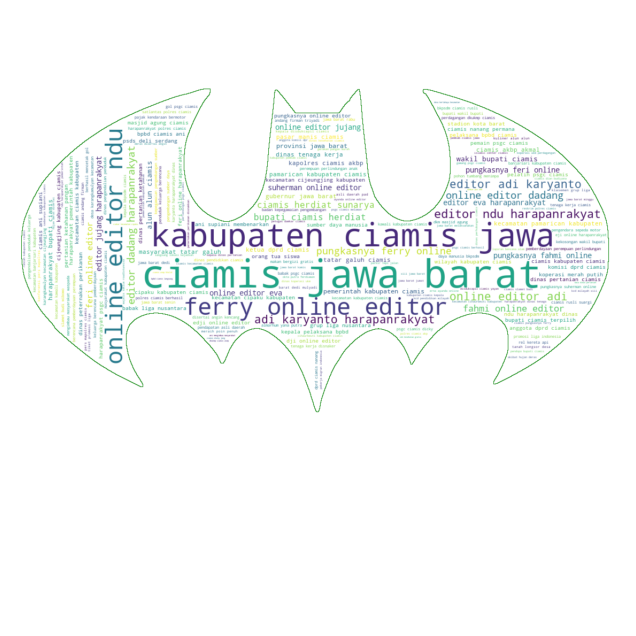

                         Frasa  Jumlah  Persentase
0            ciamis jawa barat     541        0.39
1        kabupaten ciamis jawa     351        0.25
2          ferry online editor     228        0.16
3            online editor ndu     223        0.16
4     editor ndu harapanrakyat     222        0.16
5          editor adi karyanto     211        0.15
6            online editor adi     211        0.15
7   adi karyanto harapanrakyat     209        0.15
8         online editor dadang     163        0.12
9  editor dadang harapanrakyat     162        0.12


In [26]:
wc_stopwords = set(STOPWORDS)
nltk_stopwords = set(stopwords.words('indonesian'))
stopwords_all = wc_stopwords.union(nltk_stopwords)
stopwords_all.update([
    "saja", "sudah", "para", "akan", "agar", "seperti", "karena",
    "dan", "di", "ke", "yang", "untuk", "pada", "ini", "ada", "dari",
    "tak", "itu", "saat", "juga", "dengan", "tidak", "dalam", "tersebut",
    "bisa", "melakukan"
])
text = ' '.join(df_clean['isi'].astype(str))
leaf_mask = np.array(Image.open(r"D:\Magang\Shape for wordcloud\batman.png"))

# buat wordcloud
vectorizer = CountVectorizer(
    ngram_range=(3,3),
    stop_words=list(stopwords_all),
    token_pattern=r'\b[a-zA-Z]{3,}\b'
)

X = vectorizer.fit_transform([text])
freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

wordcloud = WordCloud(
    width=1000,
    height=1000,
    background_color='white',
    mask=leaf_mask,
    contour_width=1,
    contour_color='green'
).generate_from_frequencies(freq)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
top10 = sorted(freq.items(), key=lambda x: x[1], reverse=True)[:10]

# total semua kata
total = sum(freq.values())

# buat DataFrame
df_top10 = pd.DataFrame(top10, columns=["Frasa", "Jumlah"])
df_top10["Persentase"] = (df_top10["Jumlah"] / total * 100).round(2)

print(df_top10)


Kata "dinas pertanian ciamis", "bupati ciamis terpilih", "wakil bupati ciamis" dan "komisi dprd ciamis" kata mendominasi merujuk pada pembahasan pemerintahan, pemilihat pejabat dan kinerja legislatif daerah.

Kata"court alun-alun ciamis", "food court alun-alun", "masjib agung ciamis dan "tanjakan cibeka ciamis" mengindikasikan banyaknya pemberitaan tentang fasilitas publik, tempat wisata dan infrastuktur daerah.

Kata "ciamis terendam banjir", "tertimpa pohon tumbang dan "pergerakan tanah" menandakan adanya berita kejadian alam yang berdampak pada warga.

Kata "warga cipaku ciamis", "warga pamarican ciamis" merujuk pada sorotan menjadi subject berita maupun korban/penerima kebijakan.

### K OPTIMUM

In [27]:
print("Ukuran data:", X.shape)

Ukuran data: (1, 115316)


In [28]:
print(df_clean.shape)

(850, 7)


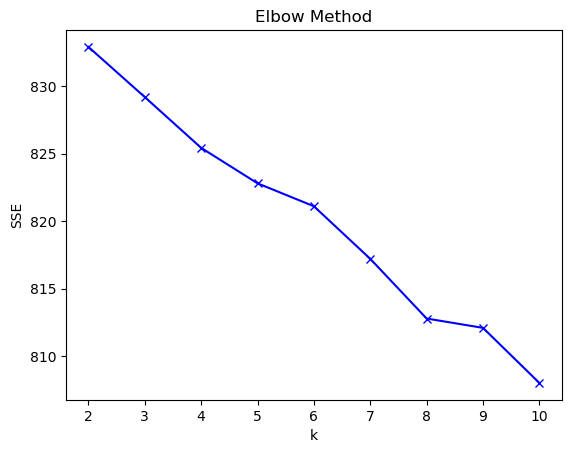

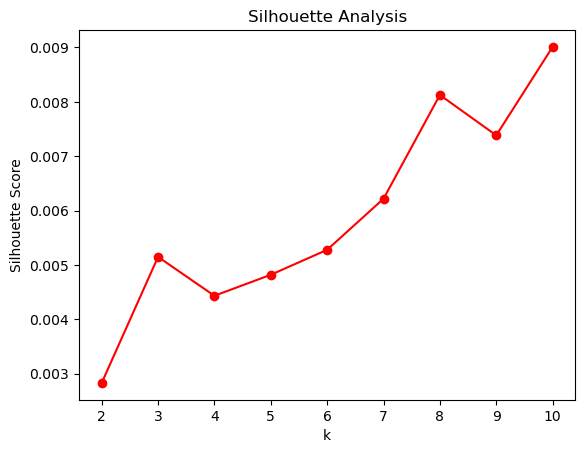

In [29]:
#k optimum kolom judul
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Vectorize kolom judul
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_clean['judul'])  

# 2. Evaluasi K-Means dengan berbagai k
sse = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# 3. Plot Elbow
plt.plot(K, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

# 4. Plot Silhouette Score
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()


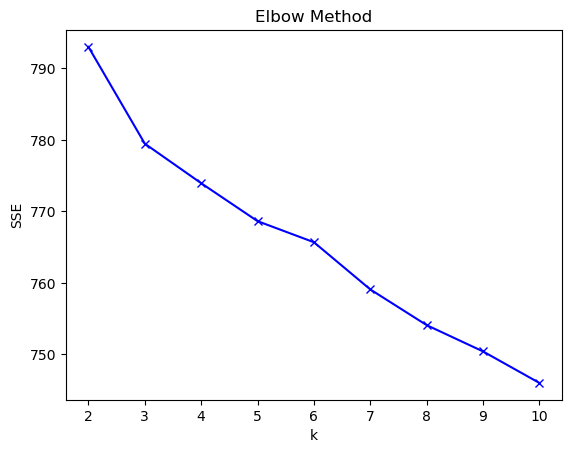

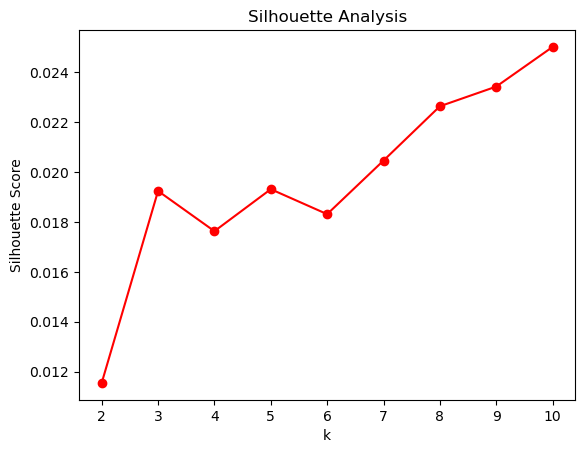

In [30]:
#k optimum kolom isi
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Vectorize kolom judul
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_clean['isi'])  

# 2. Evaluasi K-Means dengan berbagai k
sse = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# 3. Plot Elbow
plt.plot(K, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

# 4. Plot Silhouette Score
plt.plot(K, silhouette_scores, 'ro-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()


#### METODE ELBOW
Elbow meneliti keseimbangan antara jumlah cluster dan penurunan eoror
Penurunan terbesar ada setelah k=3 sebagai jumlah cluster.

#### Metode Silhouette Score 
Fokus pada kualitas pemisah cluster tanpa memperhatikan jumlahnya.
Nilai tertinggi ada pada k = 10, sillhoutte score mengukur seberapa mirip data dalam satu cluster dan seberapa jauh antar cluster. Nilai yang lebih tinggi merupakan pemisah antar cluster terbaik karena memberikan cluter lebih rapi dan terpisah jelas.

### CLUSTERING

#### CLUSTERING JUDUL

In [34]:
from sklearn.cluster import KMeans

# misal X adalah hasil TF-IDF
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(X)

In [57]:
k_opt = 3

for i in range(k_opt):
    print(f"\n=== Cluster {i} ===")
    print(df_clean[df_clean['cluster'] == i]['judul'].head(10).tolist())  # tampilkan 10 dulu



=== Cluster 0 ===
['Demi Transparansi Keuangan, Ciamis Latih Duta Digital Desa untuk Pajak Daerah', 'Galuh Go Digital dan Hot Maknyus, Strategi Pemkab Ciamis Genjot PAD Lewat Inovasi Digital', 'Disdukcapil Ciamis Jemput Bola Adminduk bagi Warga Sakit dan Disabilitas lewat Program GADIS MANIS', 'Cerita Norma, Satu-satunya Siswa Baru SMK Yasira Ciamis yang Tetap Semangat Sekolah', 'Optimis Capai Rp1,2 Miliar, Dishub Ciamis Genjot Retribusi Parkir Tepi Jalan Tahun 2025', 'Kabar Gembira untuk Pemilik Kendaraan di Ciamis, Ada Pemutihan Pajak Kendaraan dan Mutasi Gratis', 'Bapenda Ciamis Hapus Sanksi Administrasi PBB, Berlaku Sampai Akhir Juli', 'Cek Kehamilan Kucing hingga Kambing, Disnakan Ciamis Gratiskan Layanan USG Hewan', 'Disdukcapil Ciamis Tembus Tiga Besar Adminduk Prima Jabar', 'Miris! SMK Yasira Ciamis Hanya 1 Siswa Baru yang Daftar Tahun Ini']

=== Cluster 1 ===
['Hari Anak Nasional, RSUD Ciamis Hibur dan Edukasi Pasien Cilik di Ruang Melati', 'Cegah Stunting, Rina Saadah dan KK

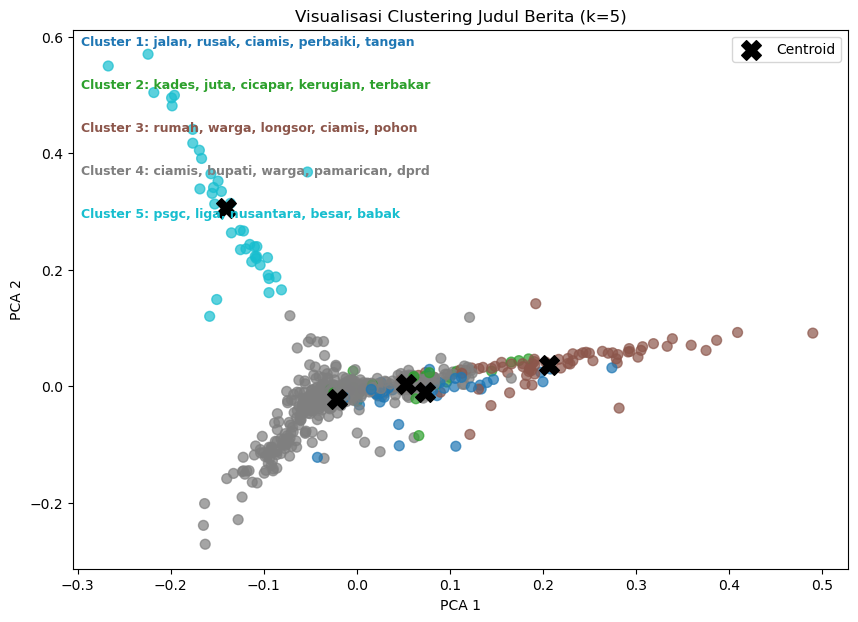

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import re

# --- 1. Preprocessing: Filter kata pendek & stopwords ---
def custom_preprocessor(text):
    text = text.lower()
    # Hilangkan karakter non-huruf
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Hilangkan kata dengan panjang <= 2
    text = ' '.join([w for w in text.split() if len(w) > 2])
    return text

stop_words_custom = ['dan', 'ke', 'untuk', 'di', 'yang', 'dari', 'dengan', 'hingga', 'ini','jadi']

vectorizer = TfidfVectorizer(
    stop_words=stop_words_custom,
    preprocessor=custom_preprocessor
)
X = vectorizer.fit_transform(df_clean['judul'])

# --- 2. K-Means Clustering ---
k_opt = 5
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# --- 3. PCA Reduksi Dimensi ---
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())
centroids = pca.transform(kmeans.cluster_centers_)

# --- 4. Ambil Topik Per Cluster ---
terms = vectorizer.get_feature_names_out()
top_n = 5
cluster_terms = []

for i in range(k_opt):
    cluster_docs_idx = np.where(labels == i)
    mean_tfidf = X[cluster_docs_idx].mean(axis=0)
    mean_tfidf = np.asarray(mean_tfidf).flatten()
    top_terms_idx = mean_tfidf.argsort()[-top_n:][::-1]
    top_terms = [terms[ind] for ind in top_terms_idx]
    cluster_terms.append(", ".join(top_terms))

# --- 5. Visualisasi ---
plt.figure(figsize=(10, 7))
cmap = cm.get_cmap('tab10', k_opt)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap=cmap, s=50, alpha=0.7)
plt.scatter(centroids[:,0], centroids[:,1], marker='X', s=200, c='black', label='Centroid')

# Tambahkan teks topik per cluster di pojok kiri atas
ax = plt.gca()
y_pos = 0.99
for i, topic in enumerate(cluster_terms):
    ax.text(0.01, y_pos, f"Cluster {i+1}: {topic}",
            transform=ax.transAxes, fontsize=9, weight='bold',
            color=cmap(i), ha='left', va='top')
    y_pos -= 0.08

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title(f"Visualisasi Clustering Judul Berita (k={k_opt})")
plt.legend()
plt.show()


#### CLUSTERING ISI

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re

def custom_preprocessor(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = ' '.join([w for w in text.split() if len(w) > 2])
    return text

stop_words_custom = ['dan', 'ke', 'untuk', 'di', 'yang', 'dari']

vectorizer = TfidfVectorizer(
    stop_words=stop_words_custom,
    preprocessor=custom_preprocessor
)

X = vectorizer.fit_transform(df_clean['judul'])


In [61]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Ambil stopwords Indonesia
stop_factory = StopWordRemoverFactory()
indo_stopwords = stop_factory.get_stop_words()

# 1. Vectorize kolom isi
vectorizer = TfidfVectorizer(stop_words=indo_stopwords, max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(df_clean['isi'])

# 2. Clustering dengan KMeans
k_opt = 5
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
df_clean['cluster_isi'] = kmeans.fit_predict(X) + 1

# 3. Cek jumlah dokumen per cluster
print(df_clean['cluster_isi'].value_counts())

cluster_isi
4    380
2    164
3    159
1    106
5     41
Name: count, dtype: int64


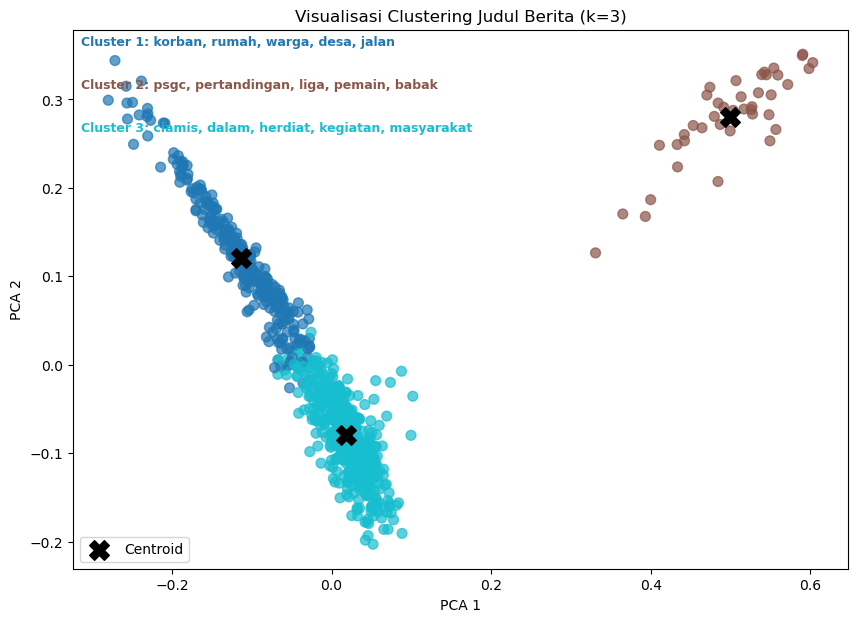

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import re

# --- 1. Preprocessing: Filter kata pendek & stopwords ---
def custom_preprocessor(text):
    text = text.lower()
    # Hilangkan karakter non-huruf
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Hilangkan kata dengan panjang <= 2
    text = ' '.join([w for w in text.split() if len(w) > 2])
    return text

stop_words_custom = ['dan', 'ke', 'untuk', 'di', 'yang', 'dari', 'dengan', 'hingga', 'ini','jadi', 'juga', 'itu', 'bisa']

vectorizer = TfidfVectorizer(
    stop_words=stop_words_custom,
    preprocessor=custom_preprocessor
)
X = vectorizer.fit_transform(df_clean['isi'])

# --- 2. K-Means Clustering ---
k_opt = 3
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# --- 3. PCA Reduksi Dimensi ---
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.toarray())
centroids = pca.transform(kmeans.cluster_centers_)

# --- 4. Ambil Topik Per Cluster ---
terms = vectorizer.get_feature_names_out()
top_n = 5
cluster_terms = []

for i in range(k_opt):
    cluster_docs_idx = np.where(labels == i)
    mean_tfidf = X[cluster_docs_idx].mean(axis=0)
    mean_tfidf = np.asarray(mean_tfidf).flatten()
    top_terms_idx = mean_tfidf.argsort()[-top_n:][::-1]
    top_terms = [terms[ind] for ind in top_terms_idx]
    cluster_terms.append(", ".join(top_terms))

# --- 5. Visualisasi ---
plt.figure(figsize=(10, 7))
cmap = cm.get_cmap('tab10', k_opt)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap=cmap, s=50, alpha=0.7)
plt.scatter(centroids[:,0], centroids[:,1], marker='X', s=200, c='black', label='Centroid')

# Tambahkan teks topik per cluster di pojok kiri atas
ax = plt.gca()
y_pos = 0.99
for i, topic in enumerate(cluster_terms):
    ax.text(0.01, y_pos, f"Cluster {i+1}: {topic}",
            transform=ax.transAxes, fontsize=9, weight='bold',
            color=cmap(i), ha='left', va='top')
    y_pos -= 0.08

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title(f"Visualisasi Clustering Judul Berita (k={k_opt})")
plt.legend()
plt.show()
